# Predicting heart disease using machine learning

This notebook uses various Python-based machine learning and data science libraries (pandas, numpy, matplotlib and sciki-learn) in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on some of their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 

The course original data came from the Cleveland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

We will be using the dataset from the 2020 annual CDC survey of 400k adults related to their health status, which can be found in Kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


## 3. Evaluation

> If we can achieve 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

In the Kaggle page we can read the next description:

    The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the exploratory variable, but note that the classes are heavily unbalanced.
    
Althought we would later find out that most of the data's types is actually _obj_. Here is the Kaggle page's descriptions of each feature from the dataset: 

>1. Heart Disease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).


>2. BMI: Body Mass Index


>3. Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]


>4. AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.


>5. Stroke: (Ever told) (you had) a stroke?


>6. PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)


>7. MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)


>8. DiffWalking: Do you have serious difficulty walking or climbing stairs?


>9. Sex: Are you male or female?


>10. AgeCategory: Fourteen-level age category


>11. Race: Imputed race/ethnicity value


>12. Diabetic: (Ever told) (you had) diabetes?


>13. PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.


>14. GenHealth: Would you say that in general your health is...


>15. SleepTime: On average, how many hours of sleep do you get in a 24-hour period?


>16. Asthma: (Ever told) (you had) asthma?


>17. KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?


>18. SkinCancer: (Ever told) (you had) skin cancer?

# Preparing the tools

We're going to use pandas, Matplotlib and NumPy fot data analysis and manipulation.

In [1]:
# Import all the tools needed

# Regular exploratory data analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier    # https://scikit-learn.org/stable/modules/sgd.html#classification
from sklearn.kernel_approximation import RBFSampler    # https://scikit-learn.org/stable/modules/kernel_approximation.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


Matplotlib is building the font cache; this may take a moment.


# Load data

In [2]:
try:
    df = pd.read_csv('datasets/heart_2020_cleaned.csv')
except FileNotFoundError:
    df = pd.read_csv('datasets\heart_2020_cleaned.csv')

df.shape #(rows, columns)

(319795, 18)

## Data exploration (EDA: exploratory data analysis)

The goal here is to find out more about the data we're working with.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how can we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
# Let's find out how many of each target class are there
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

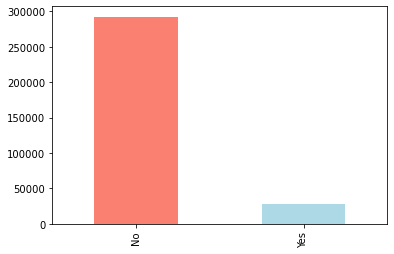

In [6]:
df['HeartDisease'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
# Here we can see how most features' data type is 'object'.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
# Are there any missing values?
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes('float64')
df_cat.info(), df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: object(14)
memory usage: 34.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (tot

(None, None)

In [12]:
# Here we get a list of the columns whose values are 'yes' or 'no' and convert them into numerical values
df_cat_yes_no = []
for col in list(df_cat.columns):
    if len(df_cat[col].value_counts().tolist()) == 2:
        df_cat_yes_no.append(col)

df[df_cat_yes_no] = df[df_cat_yes_no].apply(lambda x:x.map({'Yes':1,'No':0, 'Male':1, 'Female': 0}))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [12]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [13]:
# Here we map the diabetic category simplifying its possible answers
df[['Diabetic']] = df[['Diabetic']].apply(lambda x:x.map({'Yes':1,'No':0, 'Yes (during pregnancy)':1, 'No, borderline diabetes': 0}))

In [14]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [15]:
# Here we map the age categories to numerical values, ascending as each group represents older people
df[['AgeCategory']] = df[['AgeCategory']].apply(lambda x:x.map({'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12, '80 or older': 13}))

In [13]:
# Here we can see there are only two non-numerical features left: 'Race' and 'GenHealth'
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['float64','int64'])
df_cat.info(), df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   AgeCategory  319795 non-null  object
 1   Race         319795 non-null  object
 2   Diabetic     319795 non-null  object
 3   GenHealth    319795 non-null  object
dtypes: object(4)
memory usage: 9.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Se

(None, None)

In [14]:
# Here is evident that this is one of the features that is heavily imbalanced
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [17]:
# Here we can see the correlation of each column with our target column
df_num.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
Diabetic            0.174782
PhysicalHealth      0.170721
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
MentalHealth        0.028591
SleepTime           0.008327
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64

### Heart disease frequency according to sex

In [18]:
df.Sex.value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

In [19]:
# Compare target column with sex column
pd.crosstab(df.HeartDisease, df.Sex)

Sex,0,1
HeartDisease,,
0,156571,135851
1,11234,16139


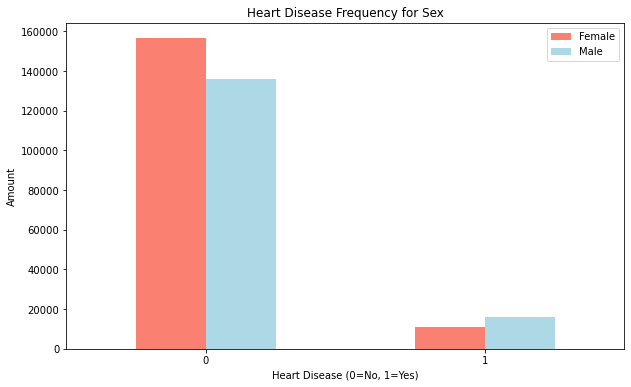

In [20]:
# Create a plot of crosstab
pd.crosstab(df.HeartDisease, df.Sex).plot(kind='bar',
                                         figsize=(10, 6),
                                         color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

C:\Users\df_du\Desktop\Compu\Python\Machine-Learning_And_Data_Science\ztm_course\heart_disease_classifier\project_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


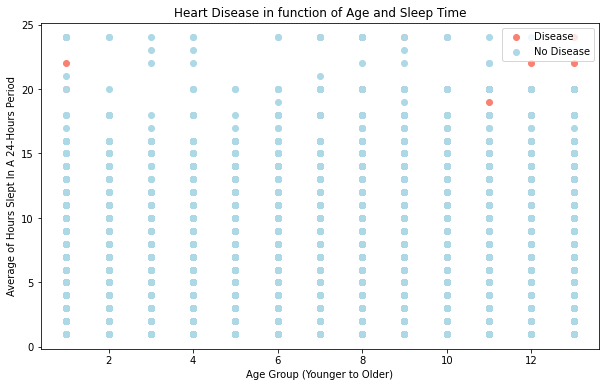

In [21]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.AgeCategory[df.HeartDisease==1],
           df.SleepTime[df.HeartDisease==1],
            c='salmon');
# Scatter with negative examples
plt.scatter(df.AgeCategory[df.HeartDisease==0],
           df.SleepTime[df.HeartDisease==0],
           c='lightblue')
# Add helpful info
plt.title('Heart Disease in function of Age and Sleep Time')
plt.xlabel('Age Group (Younger to Older)')
plt.ylabel('Average of Hours Slept In A 24-Hours Period')
plt.legend(['Disease','No Disease']);

In [22]:
df.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

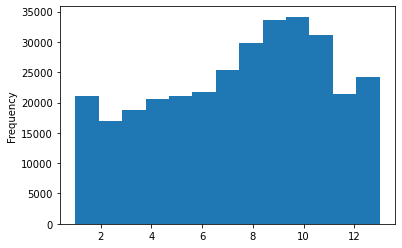

In [23]:
# Check the distribution of the age column with a histogram, this shows the categorical features in descending order as it works with the value_counts() method
df.AgeCategory.plot.hist(bins=13);

In [24]:
# Heart Disease Frequency per Race
pd.crosstab(df.Race, df.HeartDisease)

HeartDisease,0,1
Race,,
American Indian/Alaskan Native,4660,542
Asian,7802,266
Black,21210,1729
Hispanic,26003,1443
Other,10042,886
White,222705,22507


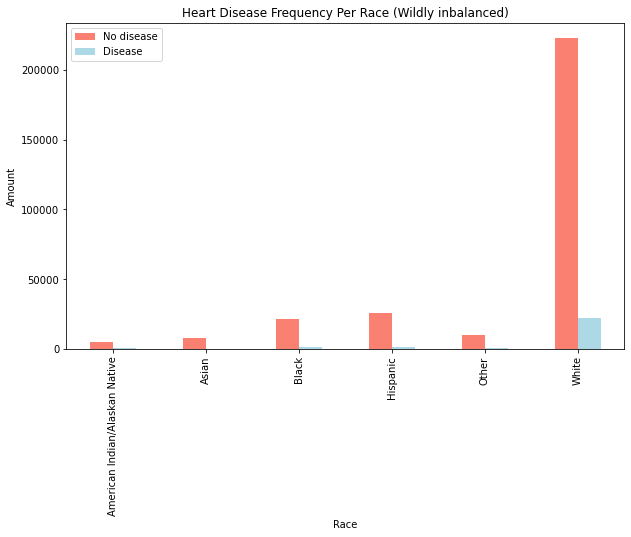

In [25]:
# Make the crosstab more visual
pd.crosstab(df.Race, df.HeartDisease).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon','lightblue'])

# Add some communication
plt.title('Heart Disease Frequency Per Race (Wildly inbalanced)')
plt.xlabel('Race')
plt.ylabel('Amount')
plt.legend(['No disease','Disease']);

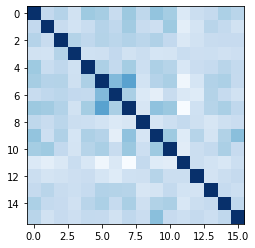

In [26]:
plt.imshow(df_num.corr(), cmap='Blues', interpolation='nearest');

In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes('object')

num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_attribs),
])

df_ready = full_pipeline.fit_transform(df)

## 5. Modelling

In [27]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,White,0,1,Very good,8.0,0,0,0


In [28]:
# Split Data into X & y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [29]:
# Split data into train, validation and test sets

X_train, X_second_phase, y_train, y_second_phase = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_second_phase, y_second_phase, test_size=0.5, random_state=42)

In [30]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
303145,20.51,0,0,0,4.0,0.0,0,0,6,White,0,1,Excellent,8.0,0,0,0
61634,30.82,0,0,0,0.0,0.0,0,0,11,Other,1,1,Very good,7.0,0,1,0
117690,33.91,0,0,0,0.0,0.0,0,1,7,White,1,1,Good,6.0,0,0,0
132104,21.59,1,0,0,0.0,0.0,0,1,13,White,0,1,Very good,8.0,0,0,0
262165,25.75,0,0,0,0.0,0.0,0,0,12,White,0,1,Very good,7.0,1,0,0


Now we've got our data split, it's time to build a machine learning model.


We'll train it (find patterns) on the training set.


We'll improve it (tweak patterns) on the validation set.


And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression (not in the map of scikit=learn models)
2. SGDClassifier
3. Kernel Approximation

In [ ]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(), 'SGD Classifier': SGDClassifier(), 'Kernel Approximation': RBFSampler()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    models: a doct of different Scikit-Learn ML models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

NameError: name 'ColumnTransformer' is not defined